In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import matplotlib

from mpl_toolkits.axes_grid1 import make_axes_locatable

In [4]:
import matplotlib.colors as colors

In [5]:
import numpy as np

In [6]:
font = {'family': 'serif',
        'weight': 'bold',
        'size': 10,
        }

In [7]:
reds = matplotlib.cm.get_cmap("Reds")
blues = matplotlib.cm.get_cmap("Blues")

In [8]:
matplotlib.rc('font', **font)

In [9]:
dfs = [pd.read_csv('../data/clean_memory_one_expected.csv'),
       pd.read_csv('../data/clean_memory_one_last_round.csv')]

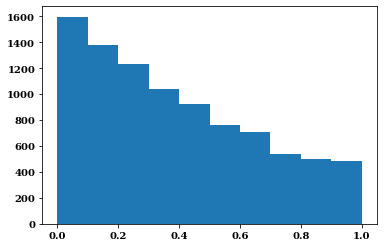

In [14]:
plt.hist(dfs[0]['p_1']);

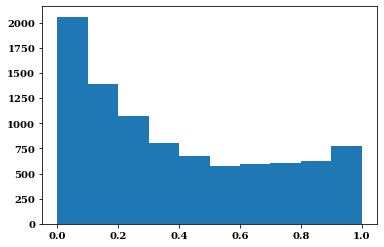

In [15]:
plt.hist(dfs[0]['p_2']);

In [30]:
heatmaps = []
extents = []

for df in dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p_1"], df["p_2"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    
    ps, qs = [], []
    for p, q, v in zip(df["p_3"], df["p_4"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

In [31]:
min_ = min([heatmap.min() for heatmap in heatmaps])

max_ = max([heatmap.max() for heatmap in heatmaps])

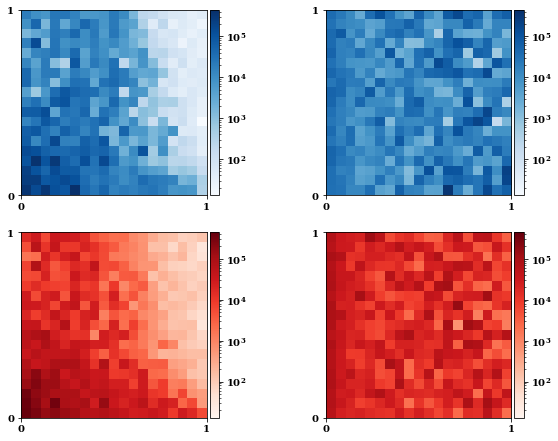

In [32]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7.5))

for i, heatmap in enumerate(heatmaps):

    index = (int(i / 2), (i % 2))

    im = axes[index].imshow(heatmap.T, extent=extents[i], origin="lower",
                            cmap=cmaps[int(i / 2)],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));


# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [33]:
dfs = [pd.read_csv('../data/clean_memory_one_b_10_expected.csv'),
       pd.read_csv('../data/clean_memory_one_b_10_last_round.csv')]

In [34]:
heatmaps = []
extents = []

for df in dfs:

    ps, qs = [], []
    for p, q, v in zip(df["p_1"], df["p_2"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)
    
    ps, qs = [], []
    for p, q, v in zip(df["p_3"], df["p_4"], df["frequencies"]):
        for _ in range(int(v)):
            ps.append(p)
            qs.append(q)
            
    heatmap, xedges, yedges = np.histogram2d(ps, qs, bins=19)

    extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
    
    heatmaps.append(heatmap)
    extents.append(extent)

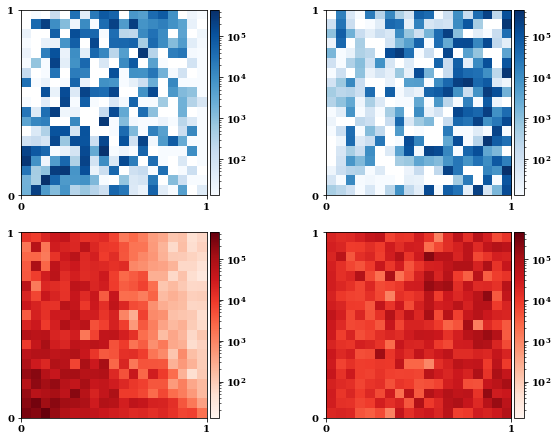

In [35]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 7.5))

for i, heatmap in enumerate(heatmaps):

    index = (int(i / 2), (i % 2))

    im = axes[index].imshow(heatmap.T, extent=extents[i], origin="lower",
                            cmap=cmaps[int(i / 2)],
                            norm=colors.LogNorm(vmin=min_, vmax=max_))

    divider = make_axes_locatable(axes[index])
    cax = divider.append_axes('right', size='5%', pad=0.05)
    fig.colorbar(im, cax=cax, orientation='vertical')

    axes[index].set_xticks(np.linspace(0, 1, 2))
    axes[index].set_yticks(np.linspace(0, 1, 2));


# fig.savefig("../static/expected_and_stochastic_for_donation_game.pdf", )

In [37]:
dfs = [pd.read_csv('../data/clean_memory_one_expected.csv'),
       pd.read_csv('../data/clean_memory_one_last_round.csv'),
       pd.read_csv('../data/clean_memory_one_b_10_expected.csv'),
       pd.read_csv('../data/clean_memory_one_b_10_last_round.csv')]

In [39]:
height = [sum(df['average cooperation rate'] * (df['frequencies'] / 10 ** 7)) for df in dfs]

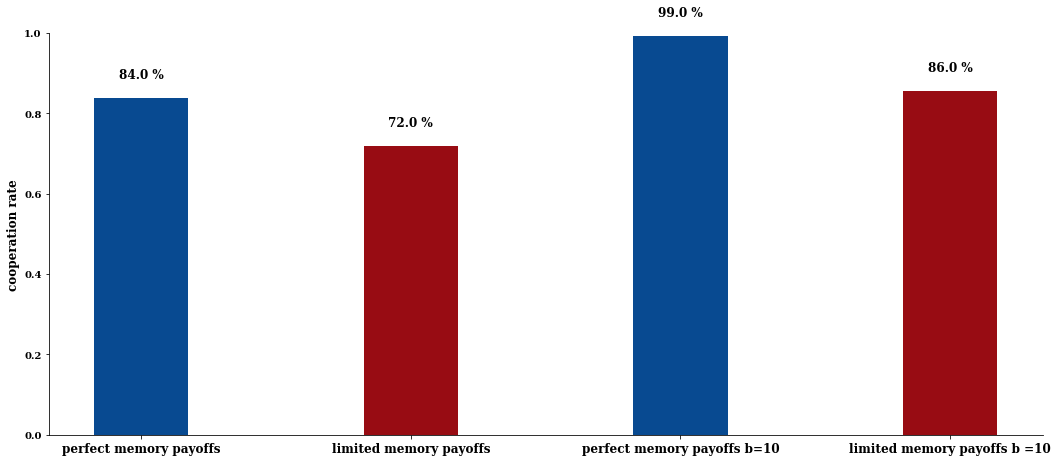

In [66]:
bars = ('perfect memory payoffs', 'limited memory payoffs', 'perfect memory payoffs b=10', 'limited memory payoffs b =10')


fig, axes = plt.subplots(figsize=(15, 6.5));

x_pos = np.arange(len(bars))

axes.bar(x_pos / 5, height, width=0.07,  color=[blues(0.9), reds(0.9), blues(0.9), reds(0.9)])

axes.set_ylabel("cooperation rate", weight="bold", fontsize=12);

axes.set_ylim(0, 1);
axes.set_xticks(x_pos / 5);
axes.set_xticklabels(bars, fontsize=12);

for ax in [axes.spines["right"], axes.spines["top"]]:
    ax.set_visible(False);

for j, pos in enumerate(x_pos / 5):
    axes.text(pos,
          height[j] + 0.05,
          f"{round(height[j], 2) * 100} %",
          horizontalalignment='center',
          color="black",
          weight='bold',
          fontsize=12
      )

plt.tight_layout();

# plt.savefig("../static/_cooperation_rates_expected_and_stochastic_for_donation_game.pdf")